## Model Training

#### 1.1 Importing Required Packages

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
warnings.filterwarnings("ignore")

#### 1.2 Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('preprocessed.csv')

In [4]:
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Food Processing,Fertilizers Manufacturing,Manure applied to Soils,Manure left on Pasture,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,total_emission
0,0.0,0.0,-0.254797,-0.306622,-0.285925,-0.260913,-0.266287,-0.282670,-0.396609,0.265576,...,-0.23004,-0.234906,-0.279588,-0.377470,-0.067985,-0.251936,-0.255666,-0.226930,-0.298854,3475.291240
1,0.0,1.0,-0.254797,-0.306622,-0.292522,-0.261686,-0.266287,-0.282670,-0.396467,0.265576,...,-0.23004,-0.063810,-0.280236,-0.376526,-0.067985,-0.251936,-0.264102,-0.227042,-0.298773,5680.135772
2,0.0,2.0,-0.254797,-0.306622,-0.292884,-0.261882,-0.266287,-0.282670,-0.397534,0.265576,...,-0.23004,-0.063810,-0.282028,-0.376001,-0.067985,-0.251936,-0.266254,-0.227395,-0.298713,5221.131572
3,0.0,3.0,-0.254797,-0.306622,-0.289531,-0.261917,-0.266287,-0.282670,-0.395072,0.265576,...,-0.23004,-0.063810,-0.279018,-0.373688,-0.067985,-0.251936,-0.268689,-0.227833,-0.298730,5316.973272
4,0.0,4.0,-0.254797,-0.306622,-0.289918,-0.261967,-0.266287,-0.282116,-0.392951,0.265576,...,-0.23004,-0.063810,-0.262831,-0.363198,-0.067985,-0.251936,-0.270830,-0.228257,-0.298743,5564.287672


#### 1.3 Preparing X and Y variables

In [5]:
X = df.drop('total_emission',axis=1)

In [6]:
X.shape

(4227, 25)

In [7]:
y = df.total_emission

In [8]:
y.shape

(4227,)

#### 1.4 Train_Test_Split 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((3381, 25), (846, 25))

#### 1.5 Create an Evaluate Function to give all metrics after model Training

In [10]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

#### 1.6 Model Training

In [11]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 12855.7685
- Mean Absolute Error: 6708.8865
- R2 Score: 0.9981
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 14659.2409
- Mean Absolute Error: 7589.0328
- R2 Score: 0.9965


Lasso
Model performance for Training set
- Root Mean Squared Error: 12855.7877
- Mean Absolute Error: 6706.9699
- R2 Score: 0.9981
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 14656.7978
- Mean Absolute Error: 7586.0126
- R2 Score: 0.9965


Ridge
Model performance for Training set
- Root Mean Squared Error: 12857.8195
- Mean Absolute Error: 6698.7249
- R2 Score: 0.9981
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 14652.2541
- Mean Absolute Error: 7569.7772
- R2 Score: 0.9965


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 21517.1754
- Mean Absolute Error: 110

#### 1.7 Results

In [12]:
results = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)
results.reset_index(drop=True,inplace = True)
results

,Model Name,R2_Score
0,Ridge,0.996462
1,Lasso,0.996460
2,Linear Regression,0.996458
3,XGBRegressor,0.994410
4,CatBoosting Regressor,0.992362
5,Random Forest Regressor,0.992043
6,K-Neighbors Regressor,0.988494
7,Decision Tree,0.980011
8,AdaBoost Regressor,0.891194


In [13]:
results.to_csv('training_results.csv')

``Since the data appears to be linearly separable and Linear Regression yields the highest R-squared score, we'll utilize it. Linear Regression, being a linear model, is computationally efficient, making it a suitable choice for our analysis.``

## Linear Regression

In [14]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 99.65


## Plot y_pred and y_test

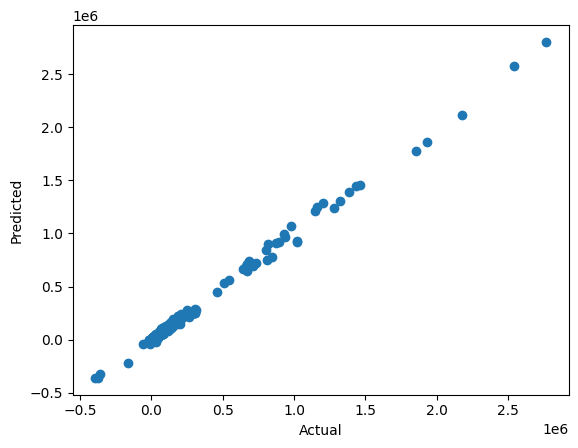

In [15]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

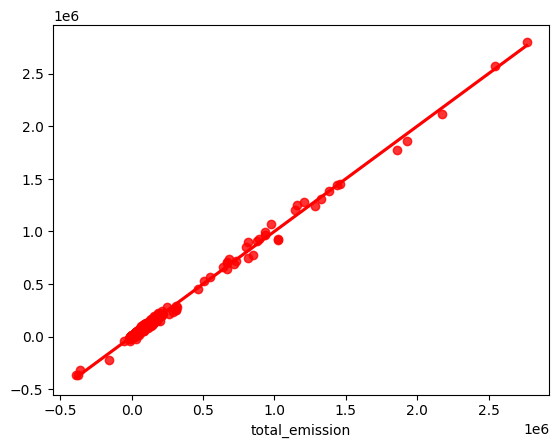

In [16]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

## Saving Model

In [17]:
import pickle
with open('linear_regression_model.p', 'wb') as file:
    pickle.dump(lin_model, file)

``Here, we preferred Linear Regression Model, because it's giving good performance as like others, though it is simple, interpretable, and computationally efficient.``